<img src="https://user-images.githubusercontent.com/18574951/90343540-a1181f80-e011-11ea-8ff5-bb21e5fdc71c.png">

# `vaex` @ Goto Copenhagen 2021

## New York Taxi Dataset (2009-2015): Exploratory Data Analysis example

Original (raw) data can be found at:
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import numpy as np

import pylab as plt
import seaborn as sns

## Main concepts of `Vaex`
 - memory mappable storage
 - shallow copies
 - expression system:
     - delayed (a.k.a _lazy_) evaluations
     - efficient algorithms
 - emphasis on aggregate data properties instead of individual samples

### Memory mappable storage (read in the data)

In [2]:
# Check file size on disk
!du -h /data/yellow_taxi_*

164G	/data/yellow_taxi_2009_2015.hdf5
108G	/data/yellow_taxi_2009_2015_f32.hdf5
12G	/data/yellow_taxi_2015_f32.arrow
12G	/data/yellow_taxi_2015_f32.hdf5


In [3]:
# Opens the data in hdf5 format
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')

In [4]:
# Basic view of the contents
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.99196,40.721565,nan,nan,-73.993805,40.695923,8.9,0.5,nan,0.0,0.0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.73629,nan,nan,-73.95585,40.76803,12.1,0.5,nan,2.0,0.0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.00259,40.739746,nan,nan,-73.86998,40.770226,23.7,0.0,nan,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.974266,40.790955,nan,nan,-73.99656,40.73185,14.9,0.5,nan,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.00158,40.719383,nan,nan,-74.00838,40.72035,3.7,0.0,nan,0.0,0.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8


In [5]:
# See the data types as usual
df.dtypes

vendor_id               large_string
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
payment_type            large_string
trip_distance                float32
pickup_longitude             float32
pickup_latitude              float32
rate_code                    float32
store_and_fwd_flag           float32
dropoff_longitude            float32
dropoff_latitude             float32
fare_amount                  float32
surcharge                    float32
mta_tax                      float32
tip_amount                   float32
tolls_amount                 float32
total_amount                 float32
dtype: object

### Shallow copies

In [6]:
useful_columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_datetime', 'dropoff_longitude', 'dropoff_latitude',
                  'passenger_count', 'payment_type', 'trip_distance', 
                  'fare_amount', 'tip_amount']

df = df[useful_columns]                  
df

#,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,passenger_count,payment_type,trip_distance,fare_amount,tip_amount
0,2009-01-04 02:52:00.000000000,-73.99196,40.721565,2009-01-04 03:02:00.000000000,-73.993805,40.695923,1,CASH,2.63,8.9,0.0
1,2009-01-04 03:31:00.000000000,-73.9821,40.73629,2009-01-04 03:38:00.000000000,-73.95585,40.76803,3,Credit,4.55,12.1,2.0
2,2009-01-03 15:43:00.000000000,-74.00259,40.739746,2009-01-03 15:57:00.000000000,-73.86998,40.770226,5,Credit,10.35,23.7,4.74
3,2009-01-01 20:52:58.000000000,-73.974266,40.790955,2009-01-01 21:14:00.000000000,-73.99656,40.73185,1,CREDIT,5.0,14.9,3.05
4,2009-01-24 16:18:23.000000000,-74.00158,40.719383,2009-01-24 16:24:56.000000000,-74.00838,40.72035,1,CASH,0.4,3.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",2015-12-31 23:59:56.000000000,-73.99381,40.72087,2016-01-01 00:08:18.000000000,-73.98621,40.72247,5,1,1.2,7.5,1.76
"1,173,057,923",2015-12-31 23:59:58.000000000,-73.96527,40.76028,2016-01-01 00:05:19.000000000,-73.939514,40.752388,2,2,2.0,7.5,0.0
"1,173,057,924",2015-12-31 23:59:59.000000000,-73.9873,40.73908,2016-01-01 00:12:55.000000000,-73.98867,40.6933,2,2,3.8,13.5,0.0
"1,173,057,925",2015-12-31 23:59:59.000000000,-73.99756,40.725693,2016-01-01 00:10:26.000000000,-74.01712,40.705322,1,2,1.96,8.5,0.0


### Interactions with the data: standard DataFrame API

In [7]:
# Lets view a column
df.trip_distance

Expression = trip_distance
Length: 1,173,057,927 dtype: float32 (column)
---------------------------------------------
         0   2.63
         1   4.55
         2  10.35
         3      5
         4    0.4
       ...       
1173057922    1.2
1173057923      2
1173057924    3.8
1173057925   1.96
1173057926   1.06

In [8]:
# Let's view another
df['pickup_datetime']

Expression = pickup_datetime
Length: 1,173,057,927 dtype: datetime64[ns] (column)
----------------------------------------------------
         0  2009-01-04 02:52:00.000000000
         1  2009-01-04 03:31:00.000000000
         2  2009-01-03 15:43:00.000000000
         3  2009-01-01 20:52:58.000000000
         4  2009-01-24 16:18:23.000000000
                   ...                   
1173057922  2015-12-31 23:59:56.000000000
1173057923  2015-12-31 23:59:58.000000000
1173057924  2015-12-31 23:59:59.000000000
1173057925  2015-12-31 23:59:59.000000000
1173057926  2015-12-31 23:59:59.000000000

### Lazy evaluation

In [9]:
# For any computation, if printed/displayed, only a preview is shown
df.fare_amount / df.trip_distance

Expression = (fare_amount / trip_distance)
Length: 1,173,057,927 dtype: float32 (expression)
-------------------------------------------------
         0  3.38403
         1  2.65934
         2  2.28986
         3     2.98
         4     9.25
        ...        
1173057922     6.25
1173057923     3.75
1173057924  3.55263
1173057925  4.33674
1173057926  12.7358

### Expressions & Virtual Columns

<img src="meme-expressions.jpg">

In [10]:
# Define a virtual column. Virtual because it uses no memory! 
# It is evaluated on the fly when needed
df['fare_by_distance'] = (df.fare_amount / df.trip_distance)

# Display the DataFrame
df.head(5)

#,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,passenger_count,payment_type,trip_distance,fare_amount,tip_amount,fare_by_distance
0,2009-01-04 02:52:00.000000000,-73.992,40.7216,2009-01-04 03:02:00.000000000,-73.9938,40.6959,1,CASH,2.63,8.9,0,3.38403
1,2009-01-04 03:31:00.000000000,-73.9821,40.7363,2009-01-04 03:38:00.000000000,-73.9558,40.768,3,Credit,4.55,12.1,2,2.65934
2,2009-01-03 15:43:00.000000000,-74.0026,40.7397,2009-01-03 15:57:00.000000000,-73.87,40.7702,5,Credit,10.35,23.7,4.74,2.28986
3,2009-01-01 20:52:58.000000000,-73.9743,40.791,2009-01-01 21:14:00.000000000,-73.9966,40.7319,1,CREDIT,5,14.9,3.05,2.98
4,2009-01-24 16:18:23.000000000,-74.0016,40.7194,2009-01-24 16:24:56.000000000,-74.0084,40.7204,1,CASH,0.4,3.7,0,9.25


### Filtering & Selections

In [12]:
# Calculate some more statistics
df.fare_by_distance.mean(progress='widget')

array(nan)

In [13]:
# Select only positive, non zero distances
df[df.trip_distance>0].fare_by_distance.mean(progress='widget')

array(6.0661801)

In [14]:
# Named selections, multiple computations in a single pass over the data
df.select(df.trip_distance>5, name='td5')
df.select(df.trip_distance>10, name='td10')

df.mean(df.fare_by_distance, selection=['td5', 'td10'], progress='widget')

array([2.97913028, 2.72859574])

### Efficient Out-Of-Core algorithms (C++ under the hood)

In [16]:
# Compute the arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# distance Copenhagen - Utrecht [miles]
arc_distance(55.6700598, 12.5642113, 52.0842715, 5.0124523)

394.59730149167126

In [17]:
# Add the arc-distance in miles as a virtual column
df['arc_distance_miles_numpy'] = arc_distance(df.pickup_longitude, df.pickup_latitude, 
                                              df.dropoff_longitude, df.dropoff_latitude)

df['arc_distance_miles_numpy'].sum(progress='widget')

array(1.49061009e+10)

In [18]:
# JIT (Just in Time) compilation. Support for Numba, Pythran and Cuda!
df['arc_distance_miles_numba'] = df.arc_distance_miles_numpy.jit_numba()

df['arc_distance_miles_numba'].sum(progress='widget')

array(1.49061003e+10)

### (Binned) Statistics

- 0-dimensional (simple statistics)

In [19]:
# Count the number of (valid) rows in the trip_distance expression
df.trip_distance.count(progress='widget')

array(1173057927)

In [20]:
# The same be done via a DataFrame method
df.count(df.trip_distance, progress='widget')

array(1173057927)

- 1-dimensional (histogram)

In [21]:
# count the number of rows per pickup_latitude
df.count(binby=df.pickup_latitude, limits=[40.5, 41], shape=16, progress='widget')

array([    23436,     37055,    140003,    364258,  18673251,   8492798,
        70176504, 404278026, 545245606,  95674209,   5403892,    860256,
          162772,     67552,     36000,     24252])

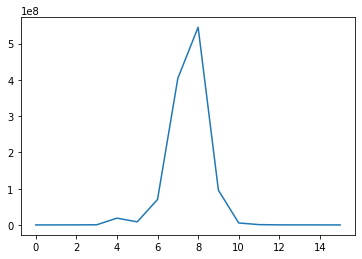

In [22]:
plt.plot(_);

- 2-dimensional (heatmap)

In [23]:
counts2d = df.count(binby=[df.pickup_longitude, df.pickup_latitude], shape=128, limits='95%', progress='widget')
print(counts2d.shape)
print()
print(counts2d)

(128, 128)

[[12  7  4 ...  7  2  3]
 [ 2  5  8 ...  8  5  6]
 [ 5  3  5 ...  3  4  3]
 ...
 [ 2  4  3 ...  8 17  7]
 [ 3  2  4 ...  4  5  8]
 [ 2  2  2 ...  5  8  2]]


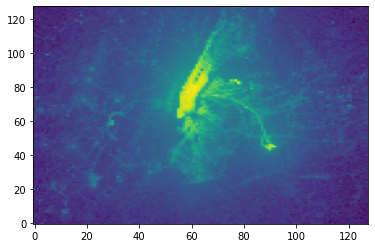

In [24]:
plt.imshow(np.log1p(counts2d).T, origin='lower', aspect='auto');

- N-dimentions (generalization)

In [25]:
counts3d = df.count(binby=[df.pickup_longitude, df.pickup_latitude, df.trip_distance], shape=64, progress='widget')
print(counts3d.shape)

(64, 64, 64)


## Data exploration

<img src="https://miro.medium.com/max/403/1*TUw8sTRFiMgV0KRyUzjWmQ.jpeg">

In [25]:
%%time
# FIXME
# Basic statistics about the dataset
df.describe()

/home/jovan/vaex/packages/vaex-core/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in true_divide
  result_data = op['op'](a_data, b_data)
/home/jovan/vaex/packages/vaex-core/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in true_divide
  result_data = op['op'](a_data, b_data)


CPU times: user 13min 23s, sys: 1min 10s, total: 14min 33s
Wall time: 2min 21s


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,passenger_count,payment_type,trip_distance,fare_amount,tip_amount,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_numba
data_type,datetime64[ns],float32,float32,datetime64[ns],float32,float32,int64,large_string,float32,float32,float32,float32,float32,float32
count,1173057927,1173057927,1173057926,1173057927,1173043432,1173050240,1173057927,1173057927,1173057927,1173057925,1173057925,1173034319,1173043431,1173043431
NA,0,0,1,0,14495,7687,0,0,0,2,2,23608,14496,14496
mean,1970-01-01T00:00:01.953533625,-72.53224844702984,39.934531393518796,1970-01-01T00:00:14.506598422,-72.53741806425094,39.9369487231104,1.6844313554517245,--,5.390923660999665,11.217308155800945,1.129457189302741,nan,12.707202892064172,12.7072023900573
std,62223927159185416.0,12.750525,9.516751,62226550675348272.0,12.676822,9.504872,1.330321,--,7756.520806,633.505037,132.842337,NaN,241.909728,241.909719
min,2009-01-01T00:00:27.365015552,-3509.015137,-3579.139404,1899-12-31T23:59:43.370698752,-3579.139404,-3579.139404,0,--,-40840124.0,-21474808.0,-1677720.125,-inf,0.0,0.0
max,2016-01-01T00:00:49.632313344,3570.224121,3577.135498,2253-08-23T08:00:13.061652480,3460.426758,3577.13501,255,--,198623008.0,825998.625,3950588.75,inf,12434.203125,12433.962891


### Abnormal number of passengers

In [26]:
df.passenger_count.value_counts(progress='widget').head(31)

1      812321234
2      172864560
5       81923912
3       51435890
6       25614703
4       24983486
0        3911410
208         1515
7            435
9            352
8            313
49            26
10            17
255           10
129            7
213            4
65             3
250            3
15             2
58             2
33             2
34             1
25             1
155            1
247            1
47             1
69             1
125            1
133            1
97             1
61             1
dtype: int64

In [27]:
# Filter abnormal number of passengers
df = df[(df.passenger_count>0) & (df.passenger_count<7)]

### Cleaning up distance values

In [28]:
df.trip_distance.value_counts(progress='widget').head(31)

1.0    27083666
0.9    26588407
0.8    26038355
1.1    25716789
1.2    24680775
0.7    24235015
1.3    23392894
1.4    22216026
0.6    21053491
1.5    20994639
1.6    19793518
1.7    18508315
1.8    17264557
0.5    16533295
1.9    16079268
2.0    15375123
2.1    13934161
2.2    12950627
2.3    12016676
2.4    11192204
0.4    11149483
2.5    10438690
2.6     9757307
2.7     9123151
2.8     8548141
2.9     7964831
0.0     7844587
3.0     7614737
3.1     6996349
3.2     6571892
3.3     6169651
dtype: int64

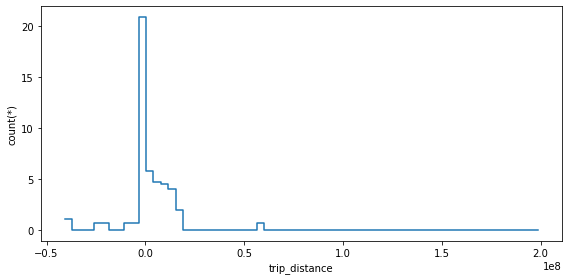

In [29]:
# Make a histograms of the trip distnaces (miles)
plt.figure(figsize=(8,4))
df.viz.histogram('trip_distance', f='log1p', progress='widget')
plt.show()

In [30]:
# What is the largest distance?
_ = df.trip_distance.max()

print(_, 'miles.')

print('This is %3.1f times larger than the distance between the Earth and the Moon!' % (_ / 238_900))
print('or')
print('This is %1.1f the distance to Mars!' % (_ / 33_900_000))

198623000.0 miles.
This is 831.4 times larger than the distance between the Earth and the Moon!
or
This is 5.9 the distance to Mars!


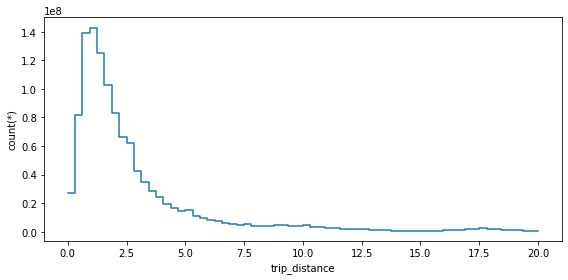

In [31]:
# Make another histogram of the trip distances, this time with a more sensible range
plt.figure(figsize=(8,4))
df.viz.histogram('trip_distance', limits=[0, 20], progress='widget')
plt.show()

In [32]:
# Filter negative and too large distances
df = df[(df.trip_distance>0) & (df.trip_distance<10)]

### What _is_ New York City really?

In [34]:
# # Interactively plot the pickup locations - helps to determine the extent of NYC covered by the taxi company
# df.widget.heatmap(df.pickup_longitude, 
#                   df.pickup_latitude, 
#                   shape=512, 
#                   f='log10', 
#                   colormap='plasma')

In [33]:
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
        (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
        (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
        (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

### Create some features

In [34]:
# Speed (miles per hour)
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))

# Time in transit (minutes)
df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')

### Trip duration

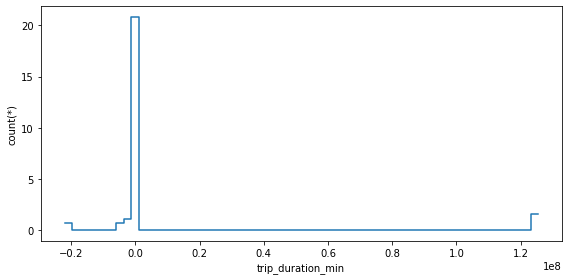

In [35]:
# Histogram of the drip durations (minutes)
plt.figure(figsize=(8,4))
df.viz.histogram('trip_duration_min', f='log1p', progress='widget')
plt.show()

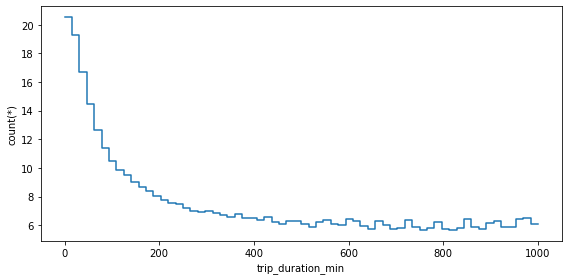

In [36]:
# Histogram of the drip durations, now with more sensible ranges
plt.figure(figsize=(8,4))
df.viz.histogram('trip_duration_min', f='log1p', limits=[0, 1000], progress='widget')
plt.show()

In [37]:
# Filter, keep durations that are within 2 hours
df = df[(df.trip_duration_min>5) & (df.trip_duration_min<120)]

### Trip speed

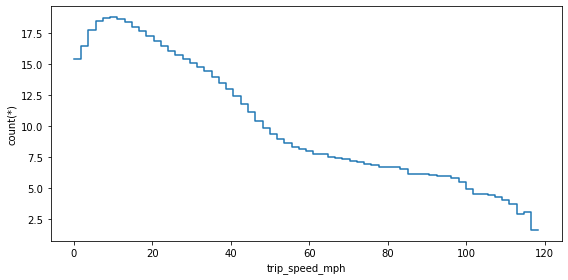

In [38]:
# Histogram of the drip durations, now with more sensible ranges
plt.figure(figsize=(8,4))
df.viz.histogram('trip_speed_mph', f='log1p', progress='widget')
plt.show()

In [39]:
# Filter, keep trips with average speeds between 2 and 60 miles per hour
df = df[(df.trip_speed_mph>=2) & (df.trip_speed_mph<=60)]

### Fare amount

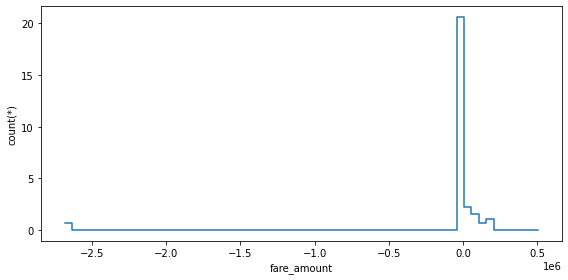

In [44]:
# Histogram of the fare amount column
plt.figure(figsize=(8,4))
df.viz.histogram('fare_amount', f='log1p', progress='widget')
plt.show()

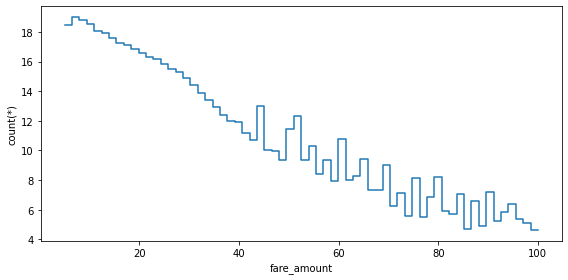

In [139]:
# Histogram of the fare amount column
plt.figure(figsize=(8, 4))
df.viz.histogram('fare_amount', f='log1p', progress='widget', limits=[5, 100])
plt.show()

In [46]:
# Filter out negateive and absurdley large fares
df = df[(df.fare_amount>=5) & (df.fare_amount<=100)]

### Fare by distance

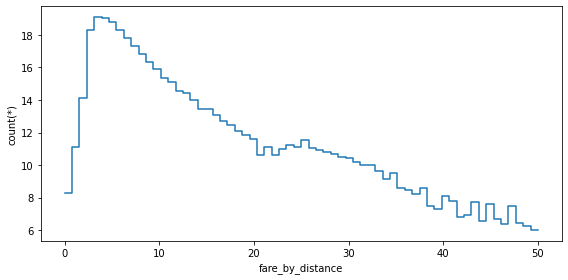

In [144]:
plt.figure(figsize=(8, 4))
df.fare_by_distance.viz.histogram(progress='widget', limits=[0, 50], f='log1p')
plt.show()

In [152]:
# Select only trips with fare by distance between [0.75 and 20]
df = df[(df.fare_by_distance>=0.75) & (df.fare_by_distance<=20)]

### Payment method

In [47]:
# Look inside the payment_type column
df.payment_type.value_counts(progress='widget')

/home/jovan/vaex/packages/vaex-core/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in true_divide
  result_data = op['op'](a_data, b_data)
/home/jovan/vaex/packages/vaex-core/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in true_divide
  result_data = op['op'](a_data, b_data)


CRD          290525651
CSH          271066172
1             72910198
CASH          47787760
2             40226870
Cash          39938533
Credit        33007252
Cre           21023991
CAS           20861861
Cas           18329802
CRE            2592861
CREDIT         1814563
UNK             799673
NOC             460501
No Charge       243215
3               207465
DIS             166929
No               88259
4                82341
Dispute          45791
Dis              18410
NA               17929
5                   10
dtype: int64

From the documentation provided:
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [48]:
# Define a mapping dictionary
map_payment_type = {'crd': 1, 'credit': 1, 'cre': 1,
                    'csh': 2, 'cash': 2, 'cas': 2,
                    'no ': 3, 'noc': 3, 'no charge': 3, 
                    'dis': 4, 'dispute': 4, 
                    'unk': 5, 'na ': 5,
                    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}


df['payment_type_clean'] = df.payment_type.str.lower().map(map_payment_type, 
                                                           default_value=-1, 
                                                           allow_missing=True)

In [49]:
# See the cleaned paymet type column
df.payment_type_clean.value_counts(progress='widget')

2    438210998
1    421874516
3       999440
5       817612
4       313471
dtype: int64

In [50]:
# Filter out trips without payment
df = df[df.payment_type_clean < 3]

### Create some date/time features

In [53]:
# Daily activities

# Hour of day
df['pu_hour'] = df.pickup_datetime.dt.hour

# Day of week
df['pu_day_of_week'] = df.pickup_datetime.dt.dayofweek

# Whether a day is weekend
df['pu_is_weekend'] = (df.pu_day_of_week>=5).astype('int')

# lists to help with the labeling
weekday_names_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [54]:
# Treat these columns as ordinal encoded values
df = df.categorize(column='pu_hour')
df = df.categorize(column='pu_day_of_week')

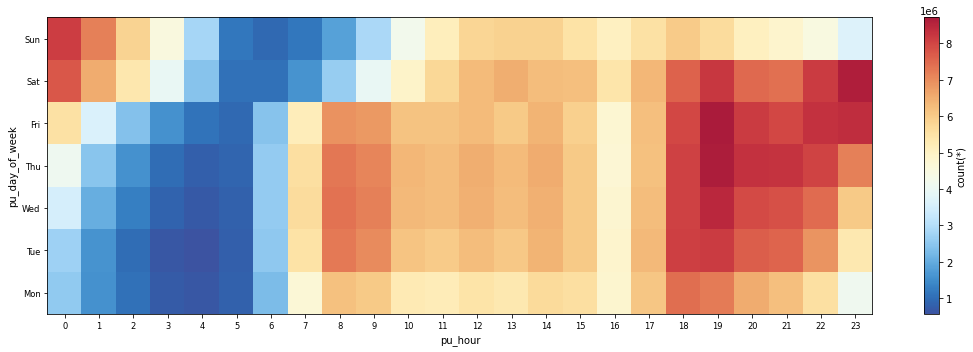

In [55]:
# Number of pick-ups per hour for a given day of the week
df.viz.heatmap('pu_hour', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), weekday_names_list)
plt.show()

### Groupby - simple example

In [56]:
df_per_hour = df.groupby(by=df.pu_hour).agg({'tip_amount': 'mean', 
                                             'trip_speed_mph': 'mean'
                                            })

# Display the grouped DataFrame
df_per_hour

#,pu_hour,tip_amount,trip_speed_mph
0,0,1.2013506616612972,14.783094268358443
1,1,1.1865903503691966,15.69367289751432
2,2,1.1754490180808215,16.43256623752847
3,3,1.1488649520845213,17.100190385705094
4,4,1.0817891735562766,18.60635040487124
...,...,...,...
19,19,1.17477467026909,11.290991796269514
20,20,1.1593064849086692,12.456885521564553
21,21,1.1937470419370273,13.212603419611867
22,22,1.2091576793610017,13.597387293808


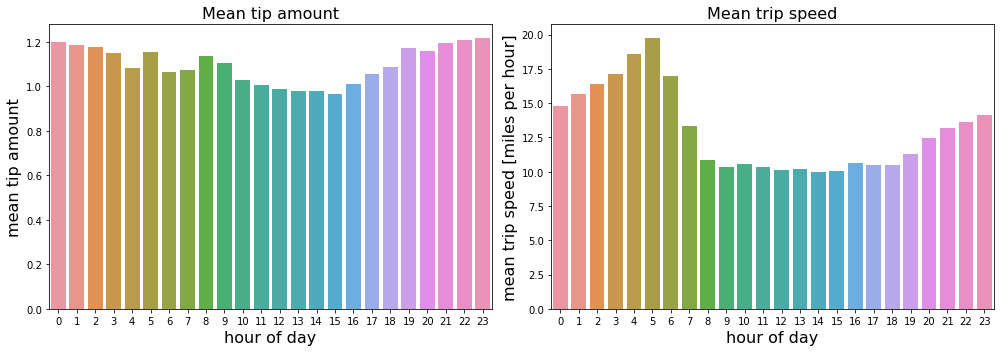

In [57]:
plt.figure(figsize=(14, 5))
fontsize = 16

plt.subplot(121)
sns.barplot(x=df_per_hour.pu_hour.to_numpy(), y=df_per_hour.tip_amount.to_numpy())
plt.title('Mean tip amount', fontsize=fontsize)
plt.xlabel('hour of day', fontsize=fontsize)
plt.ylabel('mean tip amount', fontsize=fontsize)

plt.subplot(122)
sns.barplot(x=df_per_hour.pu_hour.to_numpy(), y=df_per_hour.trip_speed_mph.to_numpy())
plt.title('Mean trip speed', fontsize=fontsize)
plt.xlabel('hour of day', fontsize=fontsize)
plt.ylabel('mean trip speed [miles per hour]', fontsize=fontsize)


plt.tight_layout()
plt.show()

### Groupby - harder example

In [84]:
# Fancy groupby
df_group = df.groupby(by=['pu_hour', 'pu_day_of_week', 'passenger_count', 'payment_type_clean'], 
                      agg={'n_trips_weekdays': vaex.agg.count(selection='pu_is_weekend==1'),
                           'n_trips_weekends': vaex.agg.count(selection='pu_is_weekend==0'),
                           'mean_fbd_weekdays': vaex.agg.mean('fare_by_distance', selection='pu_is_weekend==1'),
                           'mean_fbd_weekends': vaex.agg.mean('fare_by_distance', selection='pu_is_weekend==0'),
                          }
                     )

# Let's see the grouped DataFrame
df_group

#,pu_hour,pu_day_of_week,passenger_count,payment_type_clean,n_trips_weekdays,n_trips_weekends,mean_fbd_weekdays,mean_fbd_weekends
0,0,0,4,1,0,20949,nan,3.8893017562381793
1,0,0,4,2,0,41837,nan,3.92029325267731
2,0,0,5,1,0,76451,nan,3.6497748870568687
3,0,0,5,2,0,95827,nan,3.6362780507547083
4,0,0,6,1,0,27666,nan,3.8715458359039587
...,...,...,...,...,...,...,...,...
"2,011",23,6,1,2,1225511,0,3.9290162082764857,nan
"2,012",23,6,2,1,285228,0,3.8879270372865764,nan
"2,013",23,6,2,2,342022,0,3.926063202912963,nan
"2,014",23,6,3,1,73398,0,3.9268906476153393,nan


### Join

In [86]:
# Join the grouped dataframe on the primary one on the hour of pickup
df_joined = df.join(df_per_hour, on='pu_hour', rprefix="right_")

# Preview
df_joined

#,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,passenger_count,payment_type,trip_distance,fare_amount,tip_amount,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_numba,trip_speed_mph,trip_duration_min,payment_type_clean,pu_hour,pu_day_of_week,pu_is_weekend,right_pu_hour,right_tip_amount,right_trip_speed_mph
0,2009-01-04 02:52:00.000000000,-73.99196,40.721565,2009-01-04 03:02:00.000000000,-73.993805,40.695923,1,CASH,2.63,8.9,0.0,3.38403,0.50494874,0.5049489,15.780000686645508,10.0,2,2,6,1,2,1.1754490180808215,16.43256623752847
1,2009-01-04 03:31:00.000000000,-73.9821,40.73629,2009-01-04 03:38:00.000000000,-73.95585,40.76803,3,Credit,4.55,12.1,2.0,2.6593406,1.9123319,1.9123317,39.00000163487026,7.0,1,3,6,1,3,1.1488649520845213,17.100190385705094
2,2009-01-01 20:52:58.000000000,-73.974266,40.790955,2009-01-01 21:14:00.000000000,-73.99656,40.73185,1,CREDIT,5.0,14.9,3.05,2.98,1.9083823,1.9083822,14.263074484944532,21.033333333333335,1,20,3,0,20,1.1593064849086692,12.456885521564553
3,2009-01-16 22:35:59.000000000,-73.98981,40.735004,2009-01-16 22:43:35.000000000,-73.98502,40.724495,2,CASH,1.2,6.1,0.0,5.083333,0.38647926,0.38647926,9.473684586976702,7.6,2,22,4,0,22,1.2091576793610017,13.597387293808
4,2009-01-21 08:55:57.000000000,-73.98405,40.743546,2009-01-21 09:05:42.000000000,-73.98026,40.748924,1,CREDIT,0.4,5.7,1.0,14.249999,0.28085566,0.28085563,2.4615384982182427,9.75,1,8,2,0,8,1.1362047549118957,10.833079760130145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"860,085,509",2015-12-31 23:59:56.000000000,-73.99381,40.72087,2016-01-01 00:08:18.000000000,-73.98621,40.72247,5,1,1.2,7.5,1.76,6.2499995,0.52592033,0.5259203,8.605578031197961,8.366666666666667,1,23,3,0,23,1.2183873123797935,14.11394812847511
"860,085,510",2015-12-31 23:59:58.000000000,-73.96527,40.76028,2016-01-01 00:05:19.000000000,-73.939514,40.752388,2,2,2.0,7.5,0.0,3.75,1.786019,1.7860186,22.429906542056074,5.35,2,23,3,0,23,1.2183873123797935,14.11394812847511
"860,085,511",2015-12-31 23:59:59.000000000,-73.9873,40.73908,2016-01-01 00:12:55.000000000,-73.98867,40.6933,2,2,3.8,13.5,0.0,3.5526316,0.87766147,0.8776615,17.628865758168327,12.933333333333334,2,23,3,0,23,1.2183873123797935,14.11394812847511
"860,085,512",2015-12-31 23:59:59.000000000,-73.99756,40.725693,2016-01-01 00:10:26.000000000,-74.01712,40.705322,1,2,1.96,8.5,0.0,4.336735,1.4061309,1.4061307,11.253588735772093,10.45,2,23,3,0,23,1.2183873123797935,14.11394812847511


### What advice would we give to prospective drivers?

<img src="https://i2.wp.com/www.theinspiringjournal.com/wp-content/uploads/2021/09/Quality-Advice-for-New-Taxi-Drivers.jpg?resize=640%2C426&ssl=1">

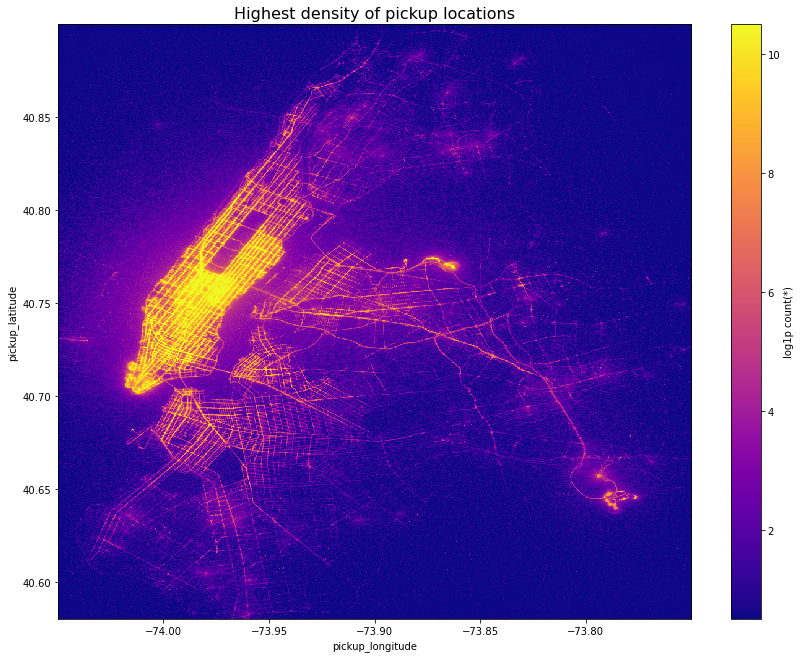

In [154]:
# Overall density map of pickup locations
plt.figure(figsize=(12, 9))
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, 
               colorbar=True, colormap='plasma', f='log1p', shape=1024, vmin=0.5, vmax=10.5)
plt.title('Highest density of pickup locations', fontsize=fontsize)
plt.show()

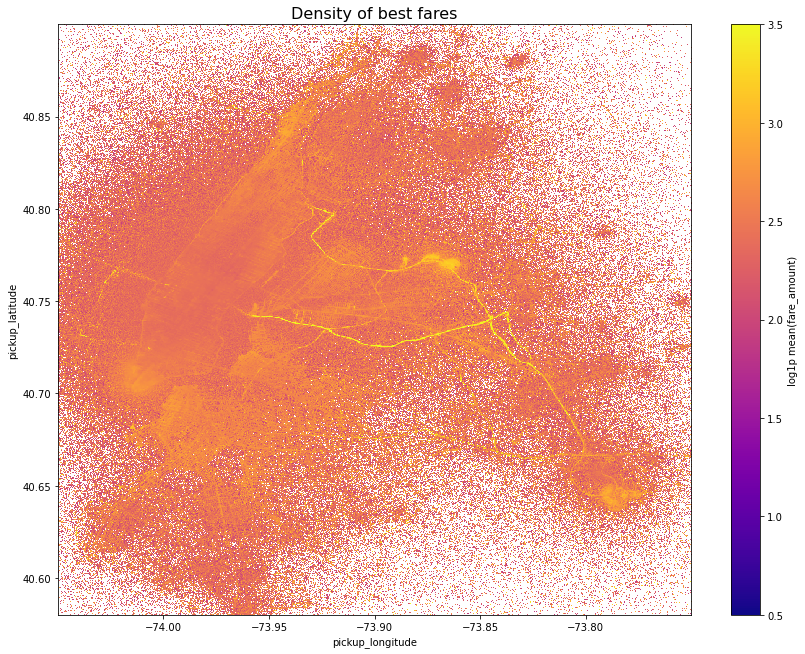

In [155]:
# Overall density map of pickup locations
plt.figure(figsize=(12, 9))
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, 
               what='mean(fare_amount)',
               colorbar=True, colormap='plasma', f='log1p', shape=1024, vmin=0.5, vmax=3.5)
plt.title('Density of best fares', fontsize=fontsize)
plt.show()

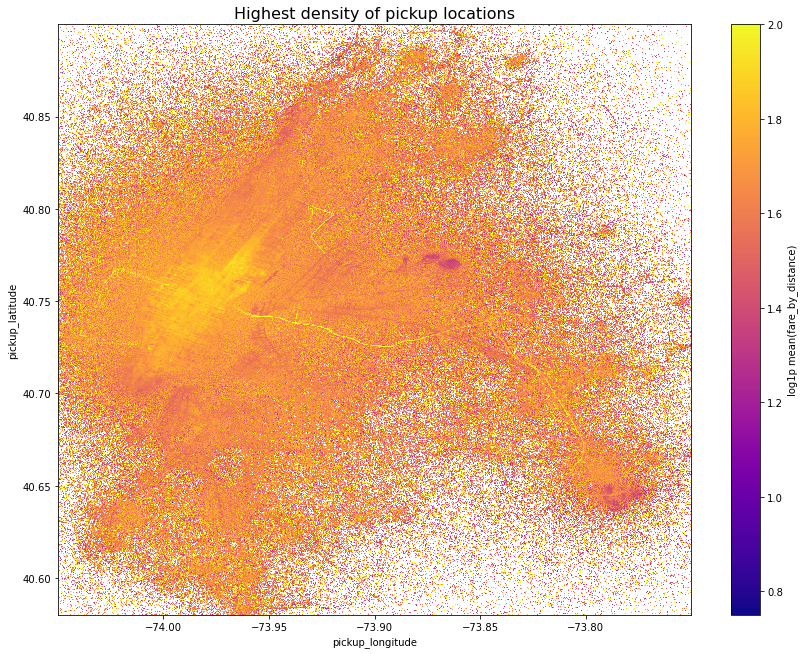

In [161]:
# Overall density map of pickup locations
plt.figure(figsize=(12, 9))
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, 
               what='mean(fare_by_distance)',
               colorbar=True, colormap='plasma', f='log1p', shape=1024, vmin=0.75, vmax=2.)
plt.title('Highest density of pickup locations', fontsize=fontsize)
plt.show()

## But wait.. there is more.. 

### Honorable mentions
- `vaex-ml`:
    - data preprocessing for ML
    - automatic pipelines
    - wrappers around popular ML libraries (`scikit-learn`, `xgboost`, `tensorflow`, `river` and others)

- Caching of results: 
    - perfect for building dashboards

- Cloud support: 
    - read and write to S3, GCS, and other public buckets of our choice

- Vaex is easy to extend:
    - write your domian & company specific `vaex-package`s or DataFrame accessors
    
 


# Thank you!

<img src="https://www.idp.com/medias/Thank-you-01.jpg?context=bWFzdGVyfGltYWdlc3wzMTkzMjZ8aW1hZ2UvanBlZ3xpbWFnZXMvaDNlL2hjNS85OTU1Nzk4MDI0MjIyLmpwZ3w0ZDQ5OTU0MjkyMjdkYTI2YTVkMmY1NmJiMzUyOWE3OTYzYTU0OTExYzM5NWU2MzE5ZWU0ZTc4ZTJkOTQwNTY0">